Necessary Imports, Calculating GPU processing time, and reading csv file into a pandas dataframe

In [1]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

import torch
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim

import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)


df= pd.read_csv('weatherAUS.csv') #reads csv file into pandas dataframe

Shows us how much data we have. 145460 records of data with 23 attributes of each record

In [2]:
df.shape

(145460, 23)

Now need to preprocess the data by removing empty values or repeated records. Also, neural networks can only work with numbers so we need to convert necessary values into integers. Lastly, we need to simplify the number of attributes we use for our neural network.

In [3]:
df.dtypes #tells us the type of each attribute

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [4]:
df.isna().sum() #shows us how many empty (n/a) values we have in each attribute

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
#replaces our dataframe with a dataframe of just the selected attributes that will be useful to our neural network

cols = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']

df = df[cols]

In [6]:
df.head()

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,No,No
1,0.0,25.0,1010.6,No,No
2,0.0,30.0,1007.6,No,No
3,0.0,16.0,1017.6,No,No
4,1.0,33.0,1010.8,No,No


In [7]:
#changes our Yes/No values in RainToday and RainTomorrow to 0s and 1s for our neural network to understand those attributes

df['RainToday'].replace({'No': 0, 'Yes':1}, inplace=True)
df['RainTomorrow'].replace({'No': 0, 'Yes':1}, inplace=True)

In [8]:
df.head()

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0.0,0.0
1,0.0,25.0,1010.6,0.0,0.0
2,0.0,30.0,1007.6,0.0,0.0
3,0.0,16.0,1017.6,0.0,0.0
4,1.0,33.0,1010.8,0.0,0.0


In [9]:
#drop all rows that contain any record with a missing column
df = df.dropna(how='any')

In [10]:
#new shape has around 21000 records less than before
df.shape

(124689, 5)

/Users/anishpalakurthi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

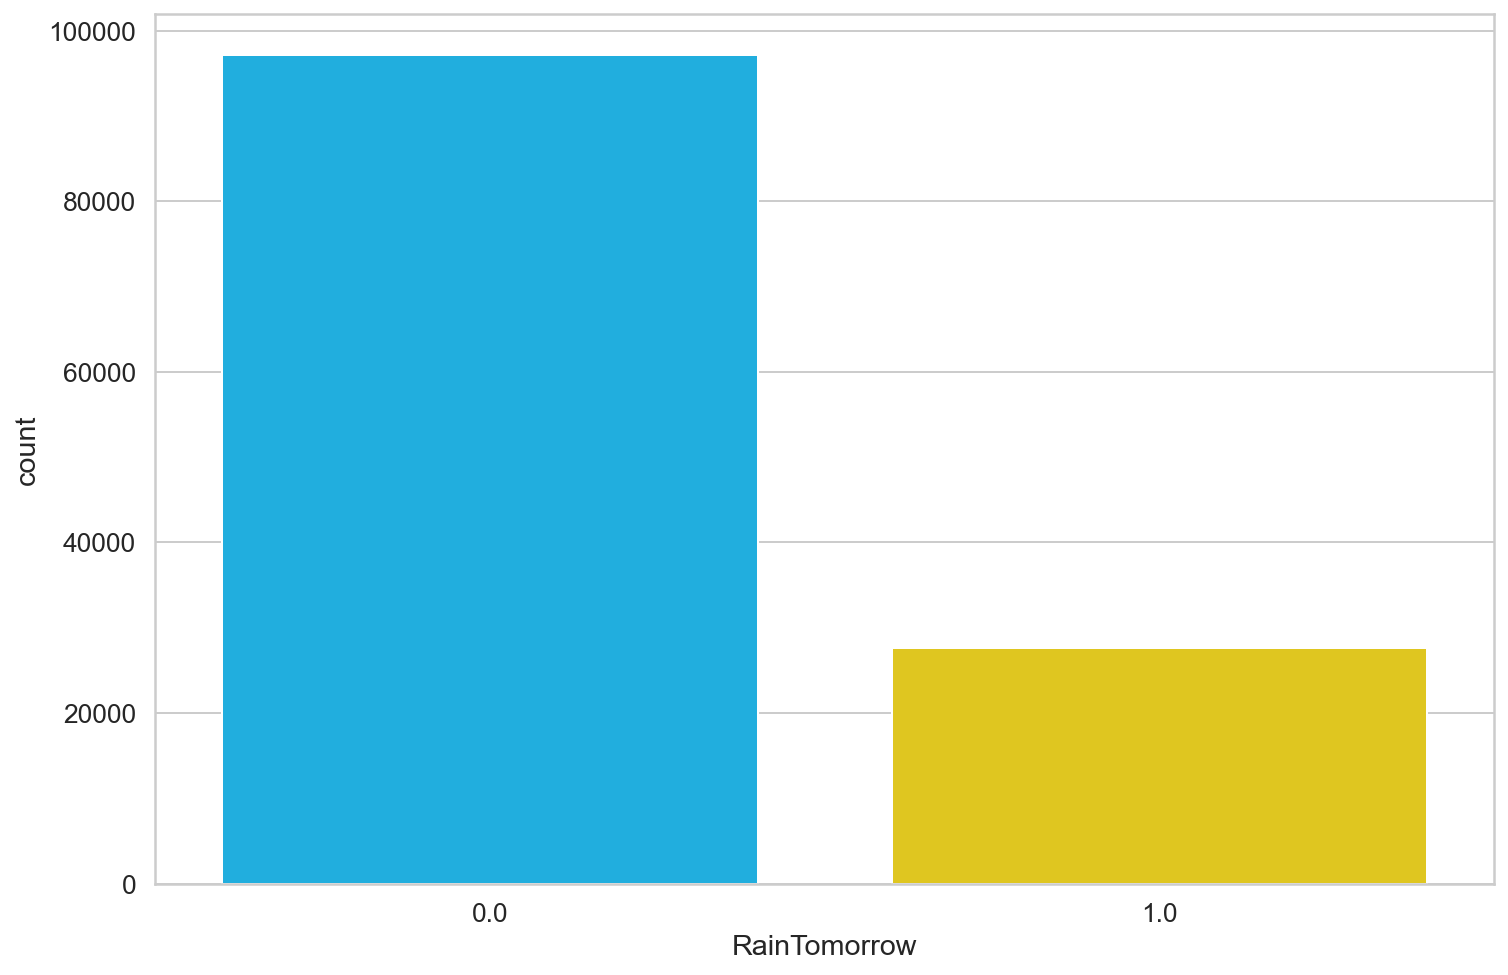

In [11]:
#first four columns are predictors and last column is prediction

sns.countplot(df.RainTomorrow)

In [12]:
df.RainTomorrow.value_counts()/df.shape[0]

0.0    0.778762
1.0    0.221238
Name: RainTomorrow, dtype: float64

In [13]:
#need rougly even data from each class so the model can understand the features of each class. not good right now

In [14]:
X = df[['Rainfall', "Humidity3pm", 'RainToday', 'Pressure9am']]
y = df[['RainTomorrow']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [15]:
X_train.shape

(99751, 4)

In [16]:
X_train.head()

,Rainfall,Humidity3pm,RainToday,Pressure9am
20021,0.0,40.0,0.0,1008.2
121658,1.6,61.0,1.0,1013.7
56593,0.0,67.0,0.0,1016.0
45916,0.0,32.0,0.0,1032.2
134351,0.2,48.0,0.0,1030.1


In [17]:
y_train.shape

(99751, 1)

In [18]:
y_train.head()

,RainTomorrow
20021,0.0
121658,1.0
56593,1.0
45916,0.0
134351,0.0


In [19]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

#converts tensors into numpy arrays of float values

In [20]:
print(X_train.shape, y_train.shape)
#very important to have the exact same shape for each so values will match

torch.Size([99751, 4]) torch.Size([99751])


Building our Neural Network 
NN's are dominating almost all tasks in ML, DL, and NLP in state of the art models. NN's can actually estimate/approximate ANY function as proven through the Universal Approximation Theorem. Input layers, hidden layers, and output layers. Hidden layers contain vertices (neurons or nodes) and each one has a numerical value that can take numbers and based on them, it predicts whether it will rain or not.

In [21]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))#activation functions break from strict linearity to transform the relationship as needed
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))
net = Net(X_train.shape[1])

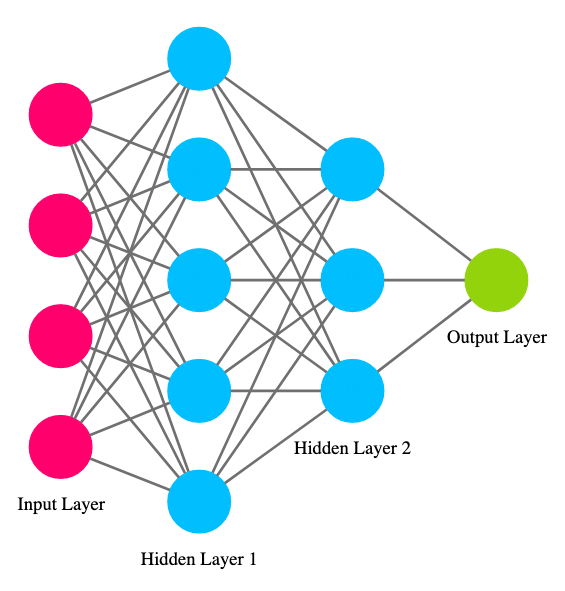

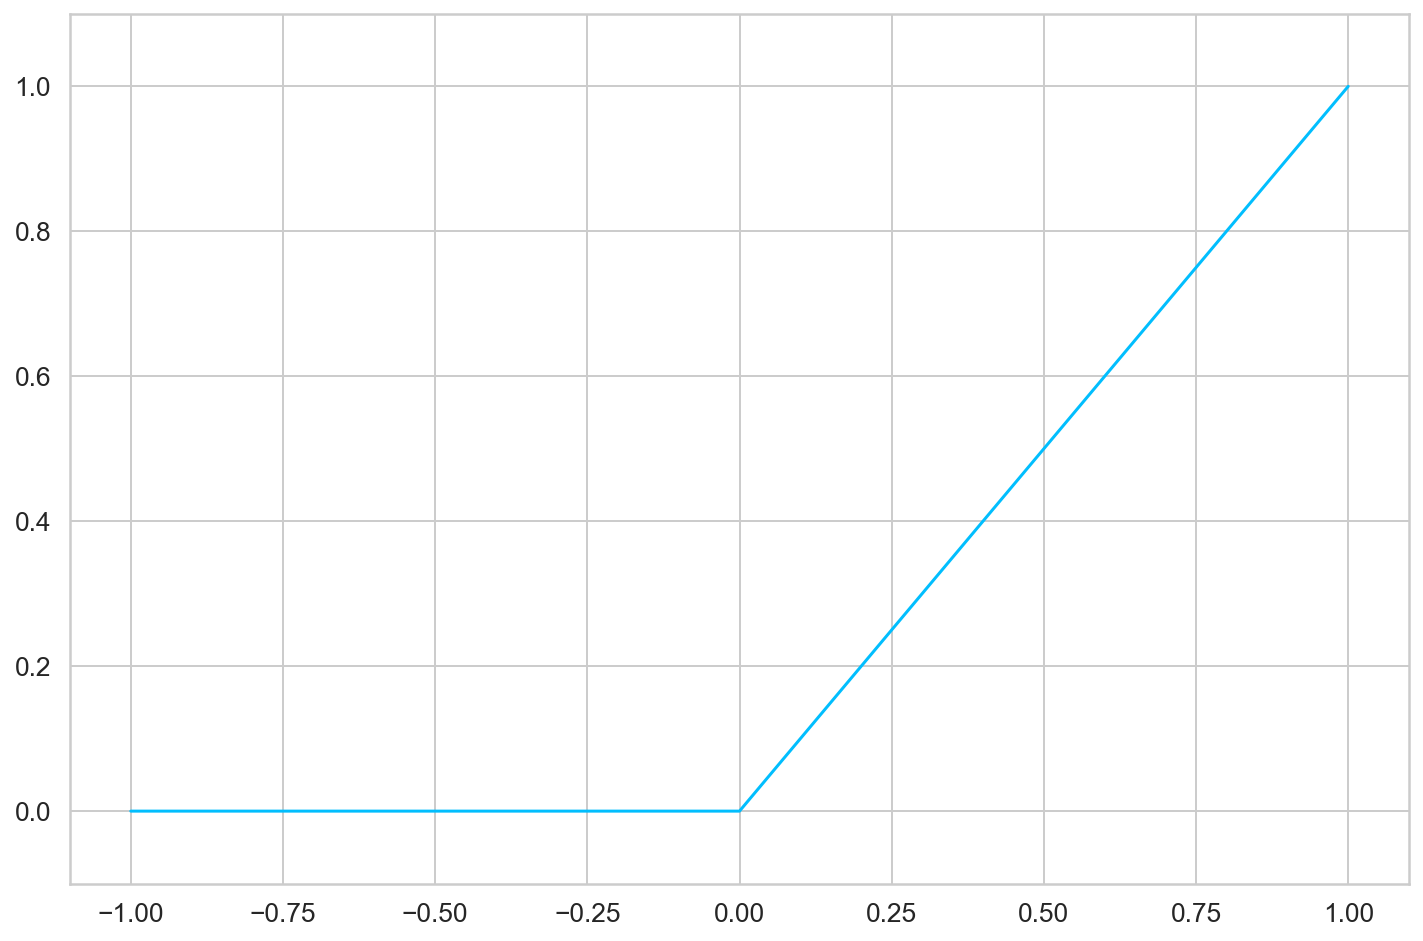

In [22]:
ax = plt.gca()

plt.plot(
    np.linspace(-1,1,5),
    F.relu(torch.linspace(-1,1, steps=5)).numpy()
)
ax.set_ylim([-0.1,1.1]);

#if input is 0 or greater, you return the value, but if it's less than 0 it flattens it to 0 = ReLu function

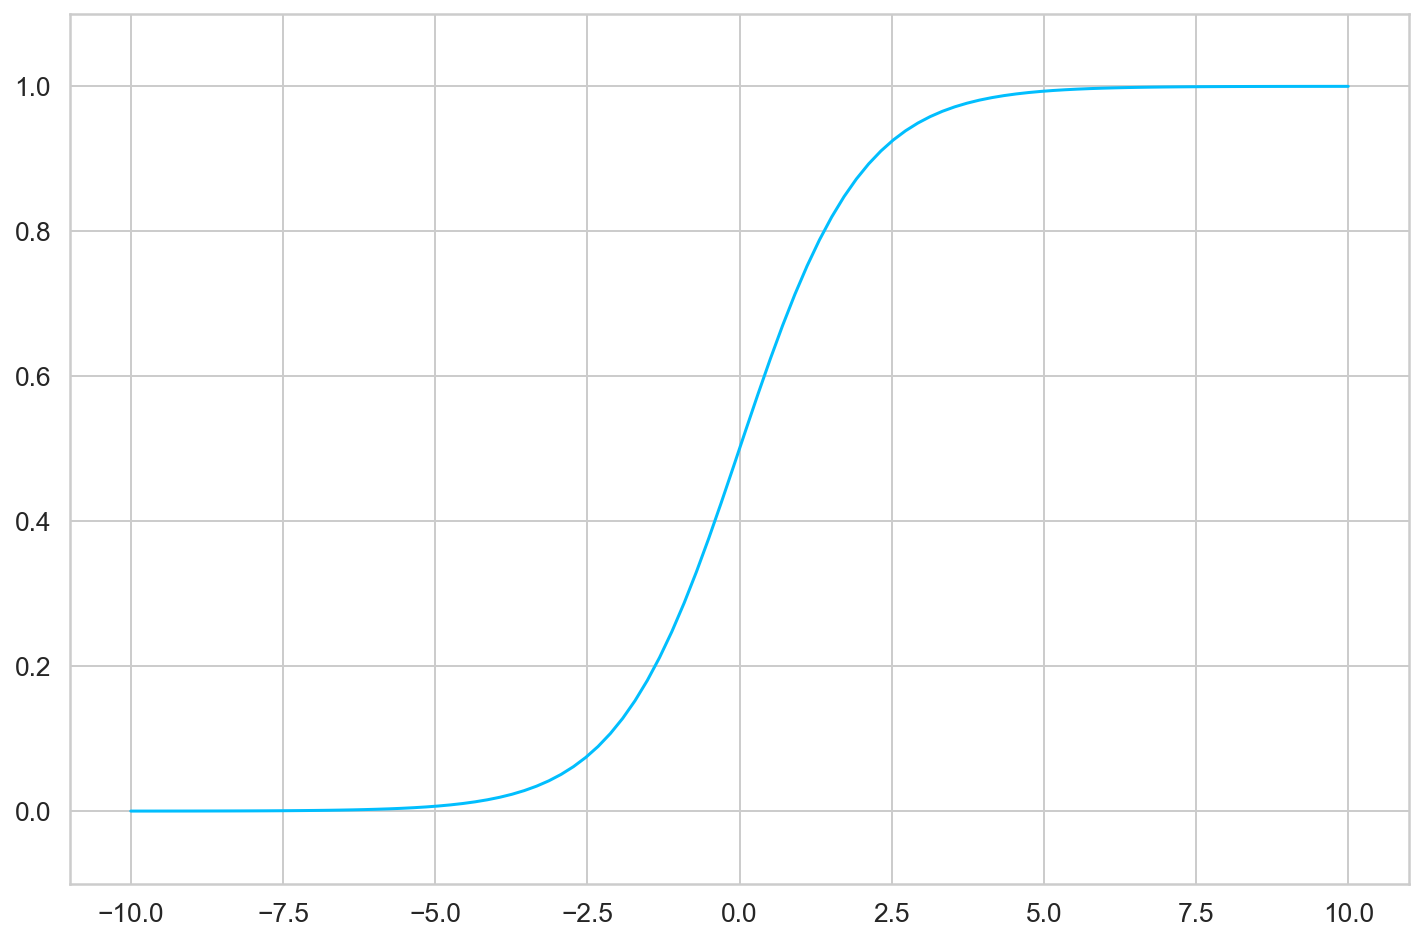

In [23]:
ax = plt.gca()

plt.plot(
    np.linspace(-10,10,100),
    torch.sigmoid(torch.linspace(-10,10, steps=100)).numpy()
)
ax.set_ylim([-0.1,1.1]);

#sigmoid function squishes input values between 0 and 1

Training

In [24]:
#binary cross measures the difference between two probability distributions
criterion = nn.BCELoss()

In [25]:
#optimizer is going to try and drive loss value as close to zero as possible by finding better parameters
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [27]:
#doing massive parallel computations is best on GPUs. If a GPU is located, this moves all operations to the GPU and otherwise uses the CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [33]:
#moves tensors to device specified above
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)


#moves model and loss function
net = net.to(device)

criterion = criterion.to(device)

In [36]:
#loss functions are cool, but accuracy is more understandable for people
#specify our accuracy function
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)
#rounds ever value below 0.5 to 0 and everything else to 1. Then calculates percentage of correct values

Time for Model Training

In [37]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(1000):
    
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0
Train set - loss: 2.513, accuracy: 0.779
Test  set - loss: 2.517, accuracy: 0.778

epoch 100
Train set - loss: 0.457, accuracy: 0.792
Test  set - loss: 0.458, accuracy: 0.793

epoch 200
Train set - loss: 0.435, accuracy: 0.801
Test  set - loss: 0.436, accuracy: 0.8

epoch 300
Train set - loss: 0.421, accuracy: 0.814
Test  set - loss: 0.421, accuracy: 0.815

epoch 400
Train set - loss: 0.412, accuracy: 0.826
Test  set - loss: 0.413, accuracy: 0.827

epoch 500
Train set - loss: 0.408, accuracy: 0.831
Test  set - loss: 0.408, accuracy: 0.832

epoch 600
Train set - loss: 0.406, accuracy: 0.833
Test  set - loss: 0.406, accuracy: 0.835

epoch 700
Train set - loss: 0.405, accuracy: 0.834
Test  set - loss: 0.405, accuracy: 0.835

epoch 800
Train set - loss: 0.404, accuracy: 0.834
Test  set - loss: 0.404, accuracy: 0.835

epoch 900
Train set - loss: 0.404, accuracy: 0.834
Test  set - loss: 0.404, accuracy: 0.836



Above, we showed our model the data 10,000 times. Each time, we measure the loss, find the errors causing it, and ask the optimizer to set better parameters

In [38]:
#saves our model after being trained
MODEL_PATH = 'model.pth'

torch.save(net, MODEL_PATH)

In [41]:
#loads our model to be applied
net = torch.load(MODEL_PATH)

Evaluation: seeing how accurate our model was

In [42]:
classes = ['No rain', 'Raining']

y_pred = net(X_test)

y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

     No rain       0.85      0.96      0.90     19413
     Raining       0.74      0.40      0.52      5525

    accuracy                           0.84     24938
   macro avg       0.80      0.68      0.71     24938
weighted avg       0.83      0.84      0.82     24938



Confusion Matrix - graphically represents the accuracy 
Top left = Correct "No Rain" Predictions
Top Right = False "No Rain" Predictions
Bottom Left = False "Will Rain" Predictions
Bottom Right = True "Will Rain" Predictions

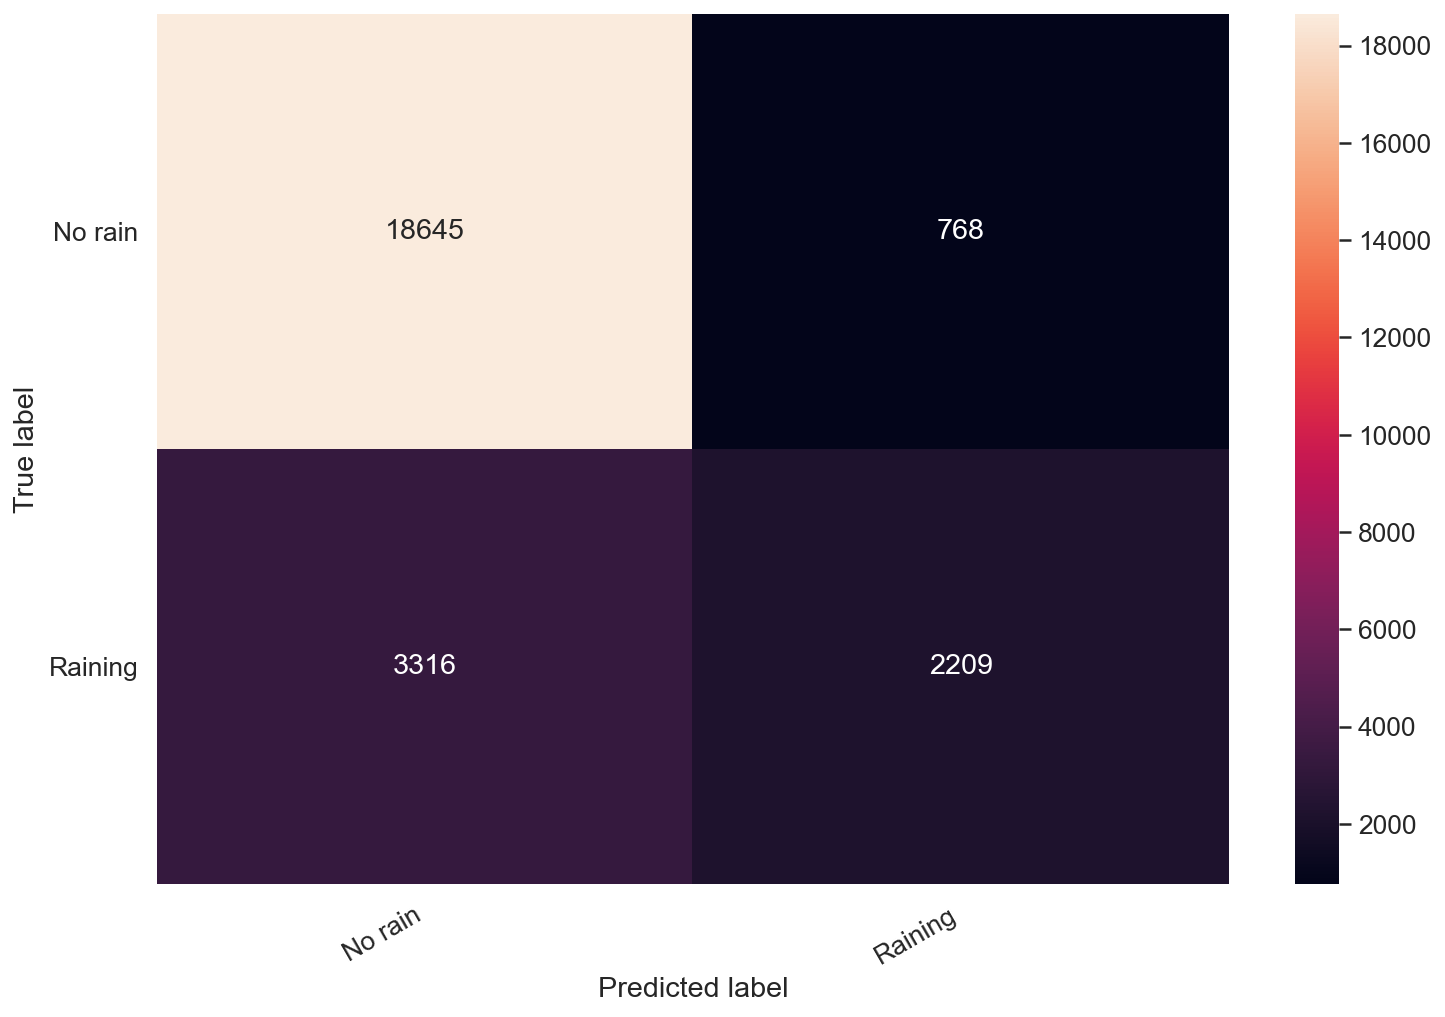

In [49]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

Test it out!

In [45]:
#defines a function for us to get a prediction from specific inputs
def will_it_rain(rainfall, humidity, rain_today, pressure):
  t = torch.as_tensor([rainfall, humidity, rain_today, pressure]) \
      .float() \
      .to(device)
  output = net(t)
  return output.ge(0.5).item()

In [46]:
will_it_rain(rainfall=10, humidity=10, rain_today=True, pressure=2)

True

In [47]:
will_it_rain(rainfall=0, humidity=1, rain_today=False, pressure=100)

False

This model does a great job of predicting for days it did NOT Rain with an almost 90% accuracy rate.
It predicts almost 75% of rainy days properly.

Dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
Thanks to Joe Young for supplying the dataset.